In [42]:
from utils.dataset import aircraft_camera_data
import utils.object_detector as od
import math
import os
import matplotlib.pyplot as plt
import cProfile
import cv2
import time
import torch
import tqdm.notebook as tqdm
import numpy as np
from utils.weather_modification import *

In [44]:
t = 5 # Time - 5
w = 1 # Weather - 5
r = 1 # Runs - 3

data_indexes = [1,2] # Camera 1 & 2
touchdown_target_lat_lon = [1.3541354199301814, 103.97961848373048] # WSSS 02L Runway
dataset_directory = "/media/gabriel/DATA/dataset"
data_sources = [[f'{dataset_directory}/t{t}/r{r}/w{w}/{data_index}/data.pkl', f'{dataset_directory}/t{t}/r{r}/w{w}/{data_index}/video.avi'] for data_index in data_indexes]

# Dataset Class Initialization
acd = aircraft_camera_data(data_sources = data_sources, touchdown_target_lat_lon = touchdown_target_lat_lon)

In [45]:
# Main Object Detector
mod = od.main_object_detector()

In [30]:
# Getting the ground truth from video
acd.compute_dtt() 

  0%|          | 0/7312 [00:00<?, ?it/s]

array([[10.27281641, 10.27281641],
       [10.27102976, 10.27102976],
       [10.26942243, 10.26942243],
       ...,
       [ 0.10846158,  0.10846158],
       [ 0.10954515,  0.10954515],
       [ 0.11063526,  0.11063526]])

In [16]:
# Getting Frame from Video
img = acd.get_frame_from_video(3000, size = (1080, 1920), batch_size = 1)[0].numpy()

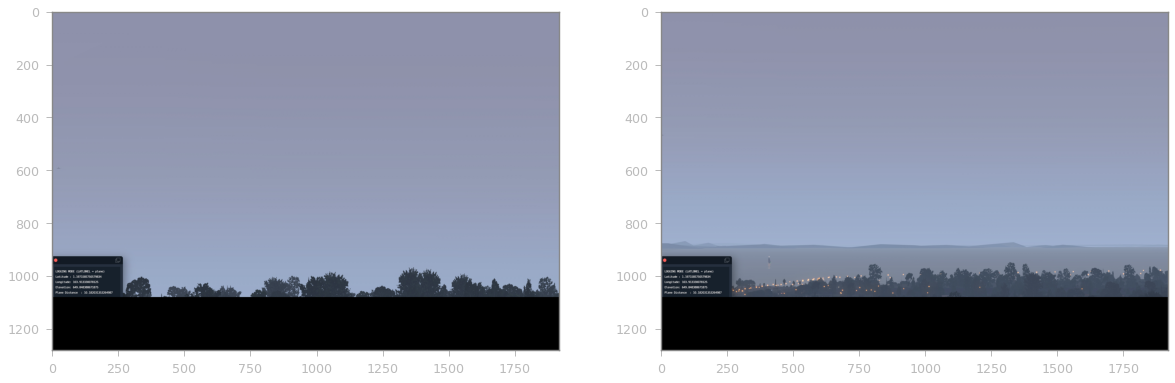

In [41]:
# Plotting the Image
fig, ax = plt.subplots(1, 2, figsize = (20,20))
ax[0].imshow(img[0][0])
ax[1].imshow(img[0][1])

In [35]:
n = 53 # Change This
img = acd.get_frame_from_video(n, size = (1280, 1920), batch_size = 1)
box, score = mod.single_infer(img)

AutoSegmentation : 0.0505216121673584
Final Inference  : 0.0076749324798583984
Post Processing  : 0.0003528594970703125


AutoSegmentation : 0.05083966255187988
Final Inference  : 0.007293224334716797
Post Processing  : 0.00012040138244628906


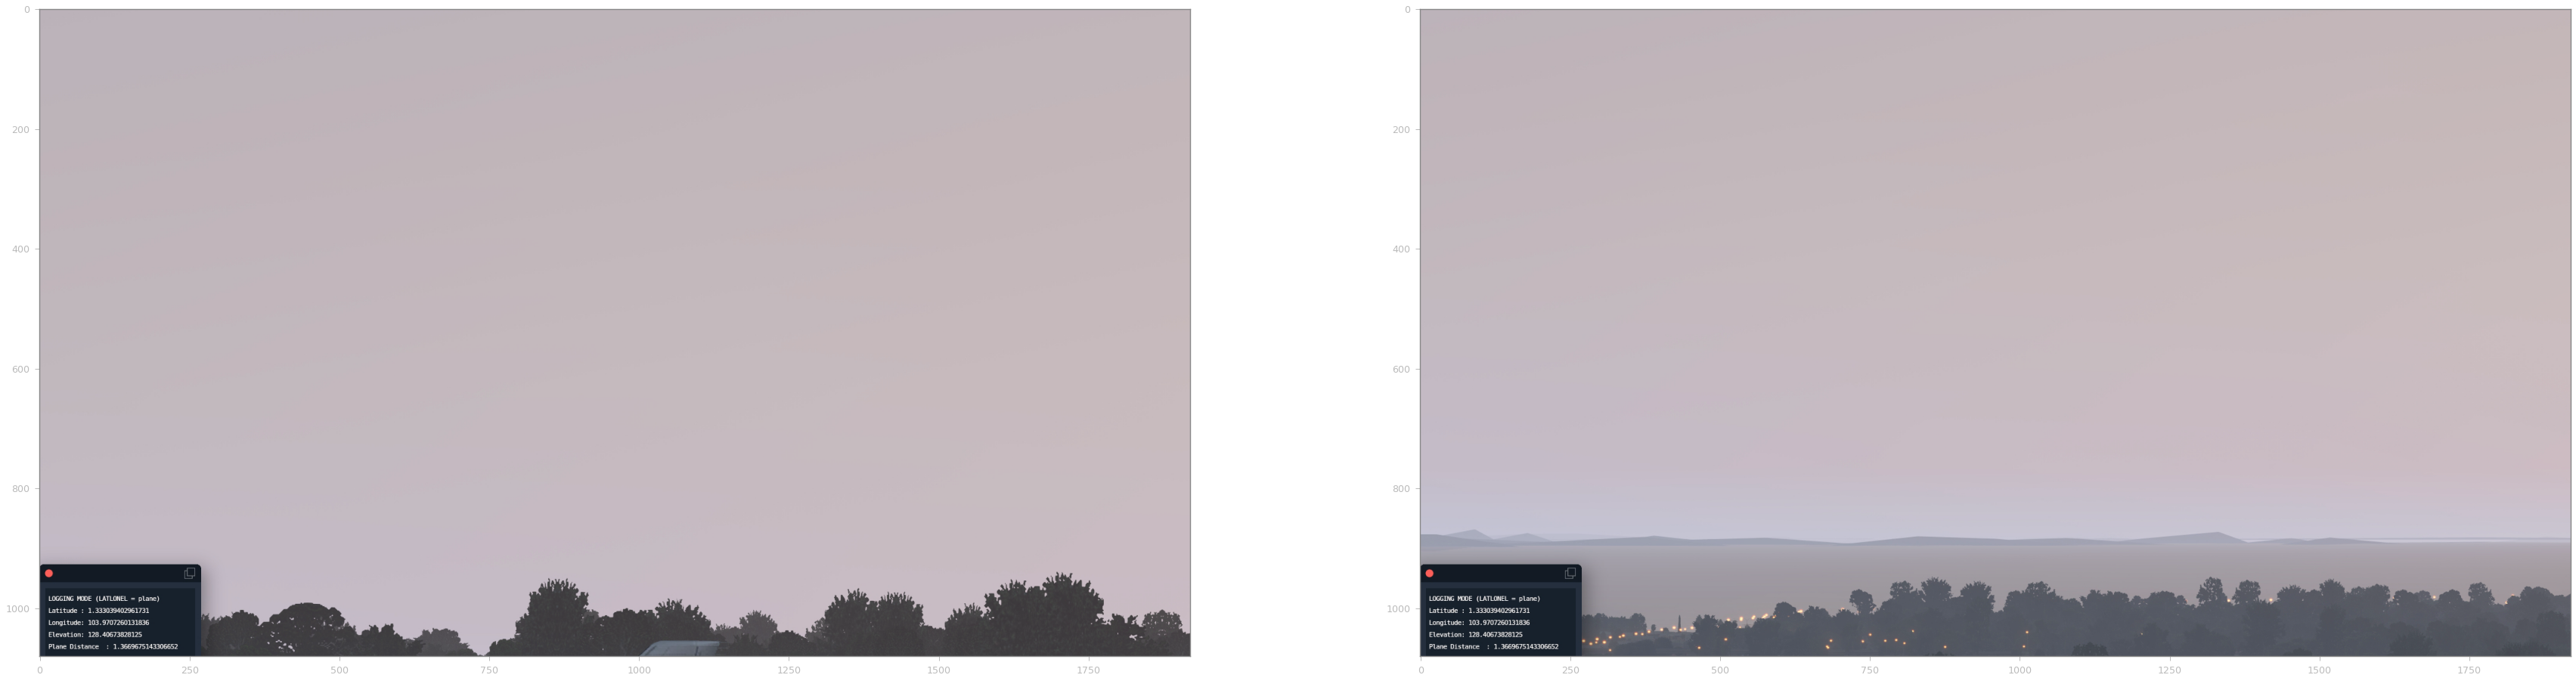

In [49]:
n = 1000 # Change This
img = acd.get_frame_from_video(6000, size = (1280, 1920), batch_size = 1)
box, score = mod.single_infer(img)
fig, ax = plt.subplots(1, 2,figsize = (60,60))
fig, ax = mod.vis(img[:, :, :1080], box, fig, ax)

AutoSegmentation : 0.05106997489929199
Final Inference  : 0.008004903793334961
Post Processing  : 0.00011897087097167969


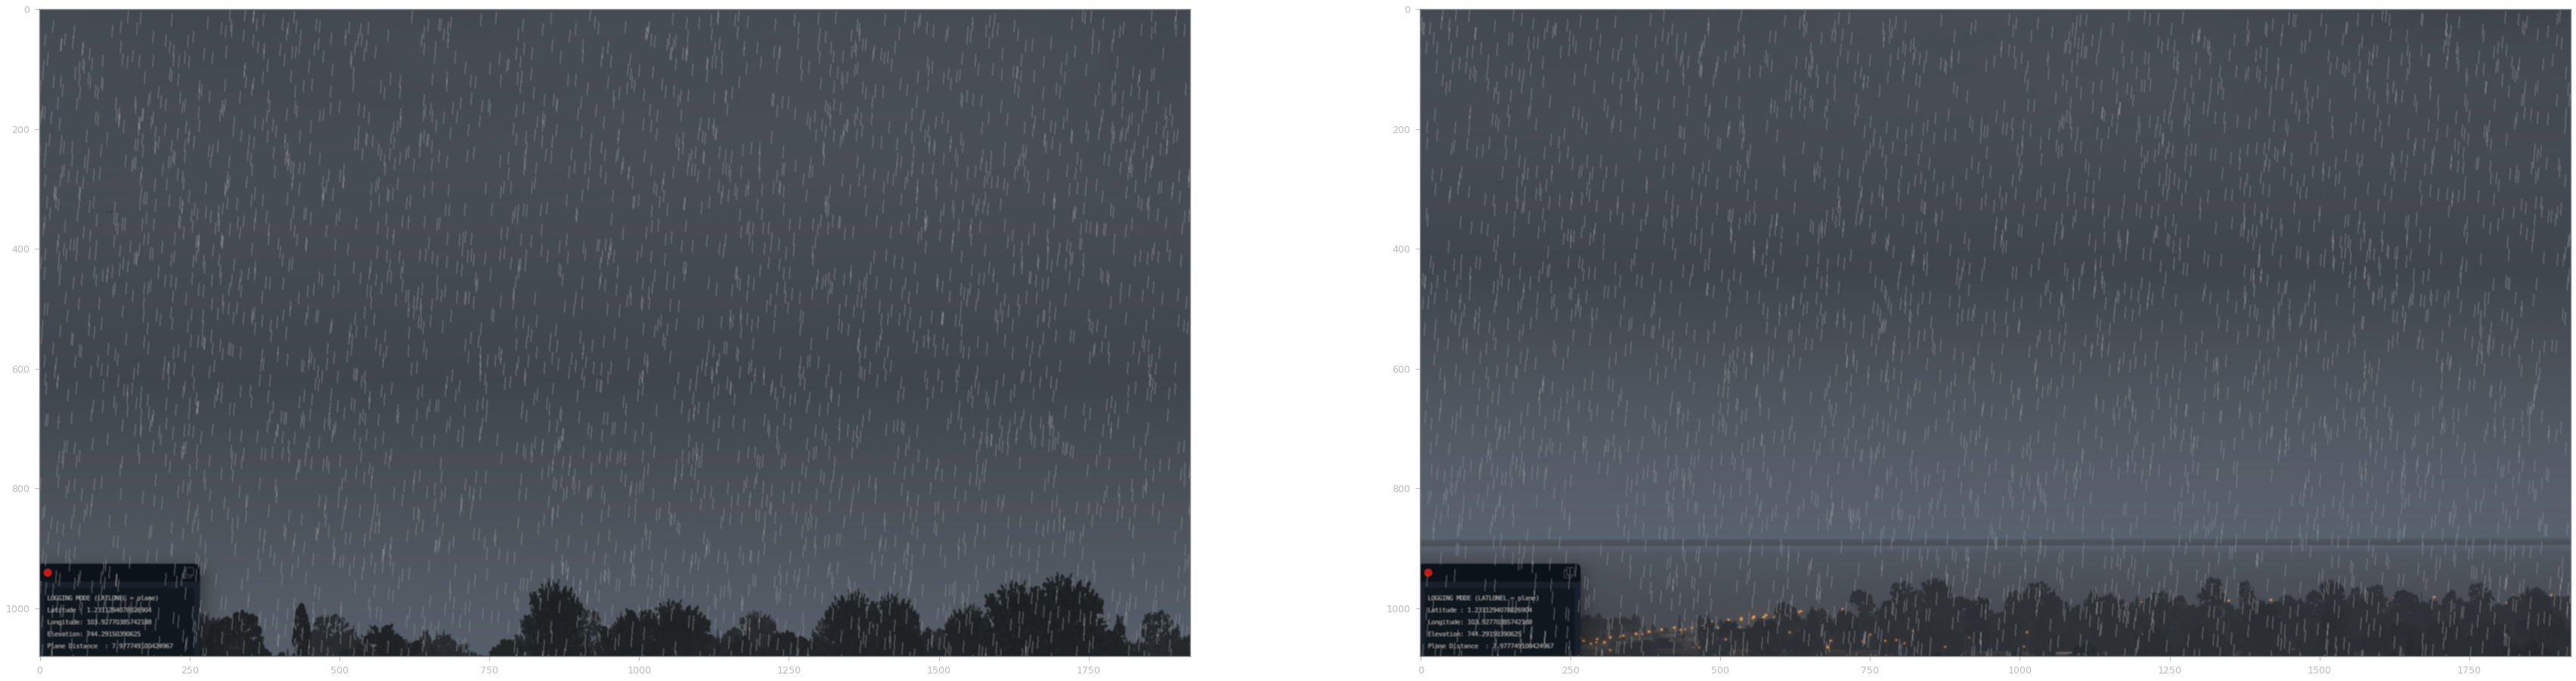

In [131]:
# Predicting using optimized YOLO
n = 1000 # Change This
img = acd.get_frame_from_video(n, size = (1280, 1920), batch_size = 1)
img[0, 0] = torch.tensor(add_rain(img[0, 0].numpy(), drop_color=(0.78, 0.78, 0.78)))
img[0, 1] = torch.tensor(add_rain(img[0, 1].numpy(), drop_color=(0.78, 0.78, 0.78)))
box, score = mod.single_infer(img)
fig, ax = plt.subplots(1, 2,figsize = (60,60))
fig, ax = mod.vis(img[:, :, :1080], box, fig, ax)

In [24]:
import pickle as pkl
import torch
with open(f"output/object_detector/t{1}w{1}r{2}.pkl", 'rb') as f:
    box, scores, gt_distance = pkl.load(f)

In [25]:
torch.where(box == box.min())

(tensor([53]), tensor([4]))

In [27]:
box[52:54].tolist()

[[9.71875, 586.0, 41.625, 596.5, 0.0, 0.0, 0.0, 0.0],
 [9.046875, 587.5, 41.5, 596.5, -0.0703125, 465.75, 11.7578125, 470.75]]